[ZeroCurve] interpolating DF at t=1.0000 from points [0, 0.08333333333333333, 0.25, 0.5]
[ZeroCurve] interpolating DF at t=1.5000 from points [0, 0.08333333333333333, 0.25, 0.5]
PV of all the cashflows except maturity is:  8.829805499006648
The bond price is:  104.65654145431809
The last cashflow is:  103.0
[ZeroCurve] interpolating DF at t=1.0000 from points [0, 0.08333333333333333, 0.25, 0.5, 2]
[ZeroCurve] interpolating DF at t=1.5000 from points [0, 0.08333333333333333, 0.25, 0.5, 2]
[ZeroCurve] interpolating DF at t=2.5000 from points [0, 0.08333333333333333, 0.25, 0.5, 2]
PV of all the cashflows except maturity is:  14.733216275961478
The bond price is:  107.3253776596165
The last cashflow is:  103.1
[ZeroCurve] interpolating DF at t=1.0000 from points [0, 0.08333333333333333, 0.25, 0.5, 2, 3]
[ZeroCurve] interpolating DF at t=1.5000 from points [0, 0.08333333333333333, 0.25, 0.5, 2, 3]
[ZeroCurve] interpolating DF at t=2.5000 from points [0, 0.08333333333333333, 0.25, 0.5, 2, 3]

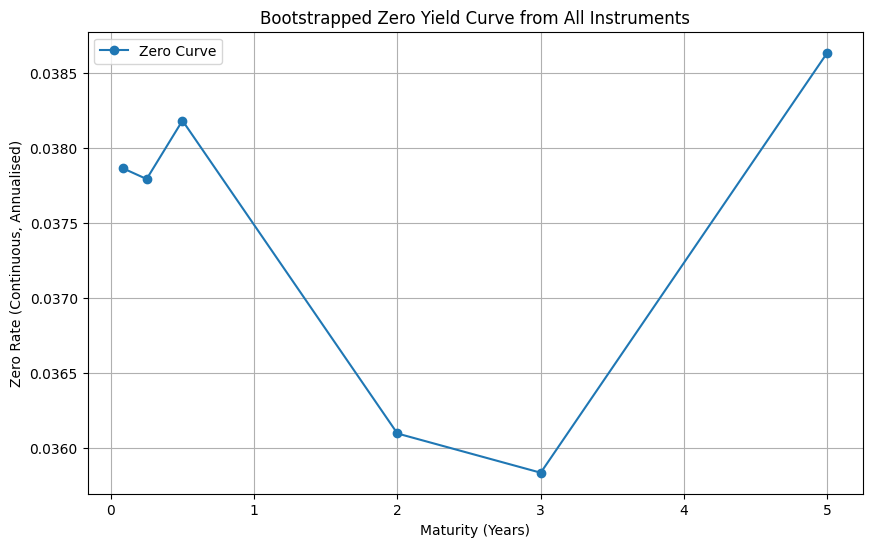

In [1]:
# --- Step 1: Create Instruments ---
from instrument_classes import Bank_bill, Bond, Portfolio
from curve_classes import YieldCurve
import matplotlib.pyplot as plt
import numpy as np
import math

# Bank Bills
bill_1m = Bank_bill(maturity=1/12)  # ≈ 1 month
bill_1m.set_ytm(0.037925)  # from CAPIQ
bill_1m.set_cash_flows()

bill_3m = Bank_bill(maturity=0.25)  # ≈ 3 months
bill_3m.set_ytm(0.037972)  # from CAPIQ
bill_3m.set_cash_flows()

bill_6m = Bank_bill(maturity=0.5)  # ≈ 6 months
bill_6m.set_ytm(0.03855)  # from CAPIQ
bill_6m.set_cash_flows()

# Bonds
bond_2y = Bond(maturity=2, coupon=0.06, frequency=2)
bond_2y.set_ytm(0.03567)  # from CAPIQ
bond_2y.set_cash_flows()

bond_3y = Bond(maturity=3, coupon=0.062, frequency=2)
bond_3y.set_ytm(0.03602)  # from CAPIQ
bond_3y.set_cash_flows()

bond_5y = Bond(maturity=5, coupon=0.065, frequency=2)
bond_5y.set_ytm(0.03802)  # from CAPIQ
bond_5y.set_cash_flows()


# --- Step 2: Build Portfolio with All Instruments ---
portfolio = Portfolio()
# Add bank bills
portfolio.add_bank_bill(bill_1m)
portfolio.add_bank_bill(bill_3m)
portfolio.add_bank_bill(bill_6m)
# Add bonds
portfolio.add_bond(bond_2y)
portfolio.add_bond(bond_3y)
portfolio.add_bond(bond_5y)
# Aggregate cash flows
portfolio.set_cash_flows()

# --- Step 3: Bootstrap Yield Curve Once ---
yield_curve = YieldCurve()
yield_curve.set_constituent_portfolio(portfolio)
yield_curve.bootstrap()

print("\n--- After bootstrapping all instruments ---")
print("Maturities in curve:", yield_curve.maturities)

# --- Step 4: Plot the Final Zero Curve ---
mats = yield_curve.maturities
zeros = [yield_curve.get_zero_rate(t) for t in mats]

# Exclude the t=0 node for cleaner plotting
mats_plot = mats[1:]
zeros_plot = zeros[1:]

plt.figure(figsize=(10, 6))
plt.plot(mats_plot, zeros_plot, marker='o', label='Zero Curve')
plt.title("Bootstrapped Zero Yield Curve from All Instruments")
plt.xlabel("Maturity (Years)")
plt.ylabel("Zero Rate (Continuous, Annualised)")
plt.grid(True)
plt.legend()
plt.show()
